The XYZ Company evaluates to buy an additional machine that will increase profits/cashflows by
- 20 USD in t1,
- 50 USD in t2,
- 70 USD in t3, 
- 100 USD in t4,
- 50 USD in t5. (each cf at period´s end)

The machine costs 200 USD (Investment in to). 

- Calculate the __Project´s IRR__ and evaluate whether XYZ should pursue the project. XYZs required rate of return is 6% p.a. 

In [1]:
cf = [-200, 20, 50, 70, 100, 50] 

In [2]:
r=0.06
step=0.000001
tolerance=0.001
npv=9999
while abs(npv)>tolerance:
    if npv>tolerance:
        r+=step
    else:
        r-=step
    npv=sum([cf[i]/(1+r)**i for i in range(len(cf))])
print(r,npv)

0.11906800000005907 0.0008063408465055488


### Solving for a Bond´s Yield to Maturity (YTM) 

The XYZ Company issued a 10Y Senior Unsecured Bond one year ago with a Coupon Rate of 5.0% (annual payments in arrears). Today´s Bond Price is 107.5 (per 100 par Value). Calculate the Bond´s __current YTM__.

In [3]:
cf = [5] * 9
cf[-1] = cf[-1] + 100
cf.insert(0, -107.5)
cf

[-107.5, 5, 5, 5, 5, 5, 5, 5, 5, 105]

In [4]:
r=0.06
step=0.0000001
tolerance=0.001
npv=9999
while abs(npv)>tolerance:
    if npv>tolerance:
        r+=step
    else:
        r-=step
    npv=sum([cf[i]/(1+r)**i for i in range(len(cf))])
print(r,npv)

0.03991809999942253 -0.0009746277258670943


In [6]:
print("The current YTM for XYZ´s Corporate Bond is {}%!".format(round(r, 3) * 100))

The current YTM for XYZ´s Corporate Bond is 4.0%!


### Plotting NPV & IRR

In [7]:
import matplotlib.pyplot as plt

In [10]:
cf = [-200, 20, 50, 70, 100, 50] 
r = 0.06
f = 1 + r

In [11]:
NPV = 0
for i in range(len(cf)):
    NPV += cf[i] / f**(i)
print(NPV)

38.71337130837991


In [12]:
l = list(range(0, 151))
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

In [13]:
rs = []
for i in l:
    rs.append(i/1000)

In [14]:
npvs = []
for i in rs:
    npv = 0
    for j in range(len(cf)):
        npv += cf[j] / (1 + i)**(j)
    npvs.append(npv)
npvs

[90.0,
 89.02233533830645,
 88.04932277268327,
 87.08093458060883,
 86.1171432359879,
 85.15792140754817,
 84.20324195724834,
 83.25307793870432,
 82.30740259562623,
 81.3661893602733,
 80.42941185192001,
 79.49704387533896,
 78.5690594192948,
 77.64543265505522,
 76.72613793491223,
 75.81114979072012,
 74.90044293244378,
 73.99399224672311,
 73.09177279544778,
 72.19375981434803,
 71.2999287115945,
 70.41025506641506,
 69.52471462772012,
 68.64328331274393,
 67.76593720569507,
 66.89265255642215,
 66.02340577908858,
 65.15817345086228,
 64.29693231061431,
 63.43965925763209,
 62.5863313503413,
 61.736925805042254,
 60.89141999465465,
 60.04979144747654,
 59.21201784595149,
 58.378077025449706,
 57.54794697305712,
 56.72160582637826,
 55.899031872346974,
 55.08020354605044,
 54.26509942956098,
 53.45369825078115,
 52.64597888229602,
 51.84192034023874,
 51.04150178316316,
 50.24470251092959,
 49.451501963597046,
 48.66187972032871,
 47.875815498303844,
 47.09328915164238,
 46.314280670

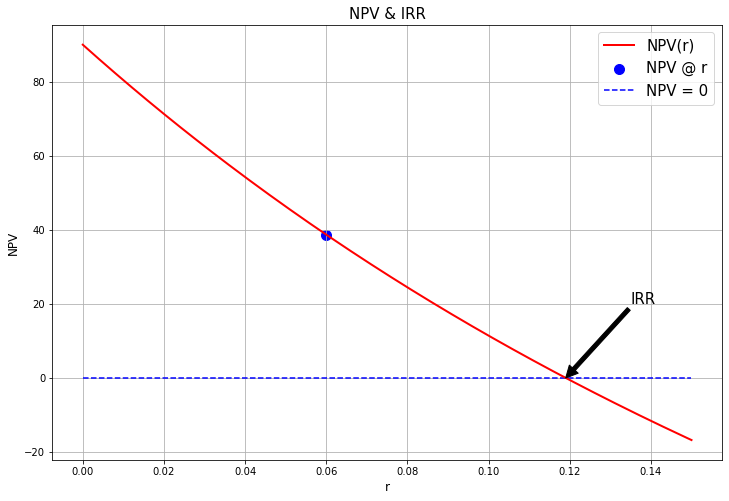

In [15]:
plt.figure(figsize = (12, 8))
plt.scatter(x = r, y = NPV, s = 100, c = "blue", marker = "o", label = "NPV @ r")
plt.plot(rs, npvs, color = "red", linewidth = 2, linestyle = "-", label = "NPV(r)")
plt.grid()
plt.hlines(y = 0, xmin = rs[0], xmax = rs[-1], linestyles= "dashed", color = "blue", label = "NPV = 0")
plt.title("NPV & IRR", fontsize = 15)
plt.xlabel("r", fontsize = 12)
plt.ylabel("NPV", fontsize = 12)
plt.annotate("IRR", xy = (0.119, 0), xytext = (0.135, 20), arrowprops={'color':'black'}, fontsize = 15)
plt.legend(loc = "best", fontsize = 15)
plt.show()